<a href="https://colab.research.google.com/github/Kushisuvarna/program/blob/main/heartdisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [4]:
df=pd.read_csv('/content/heart.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


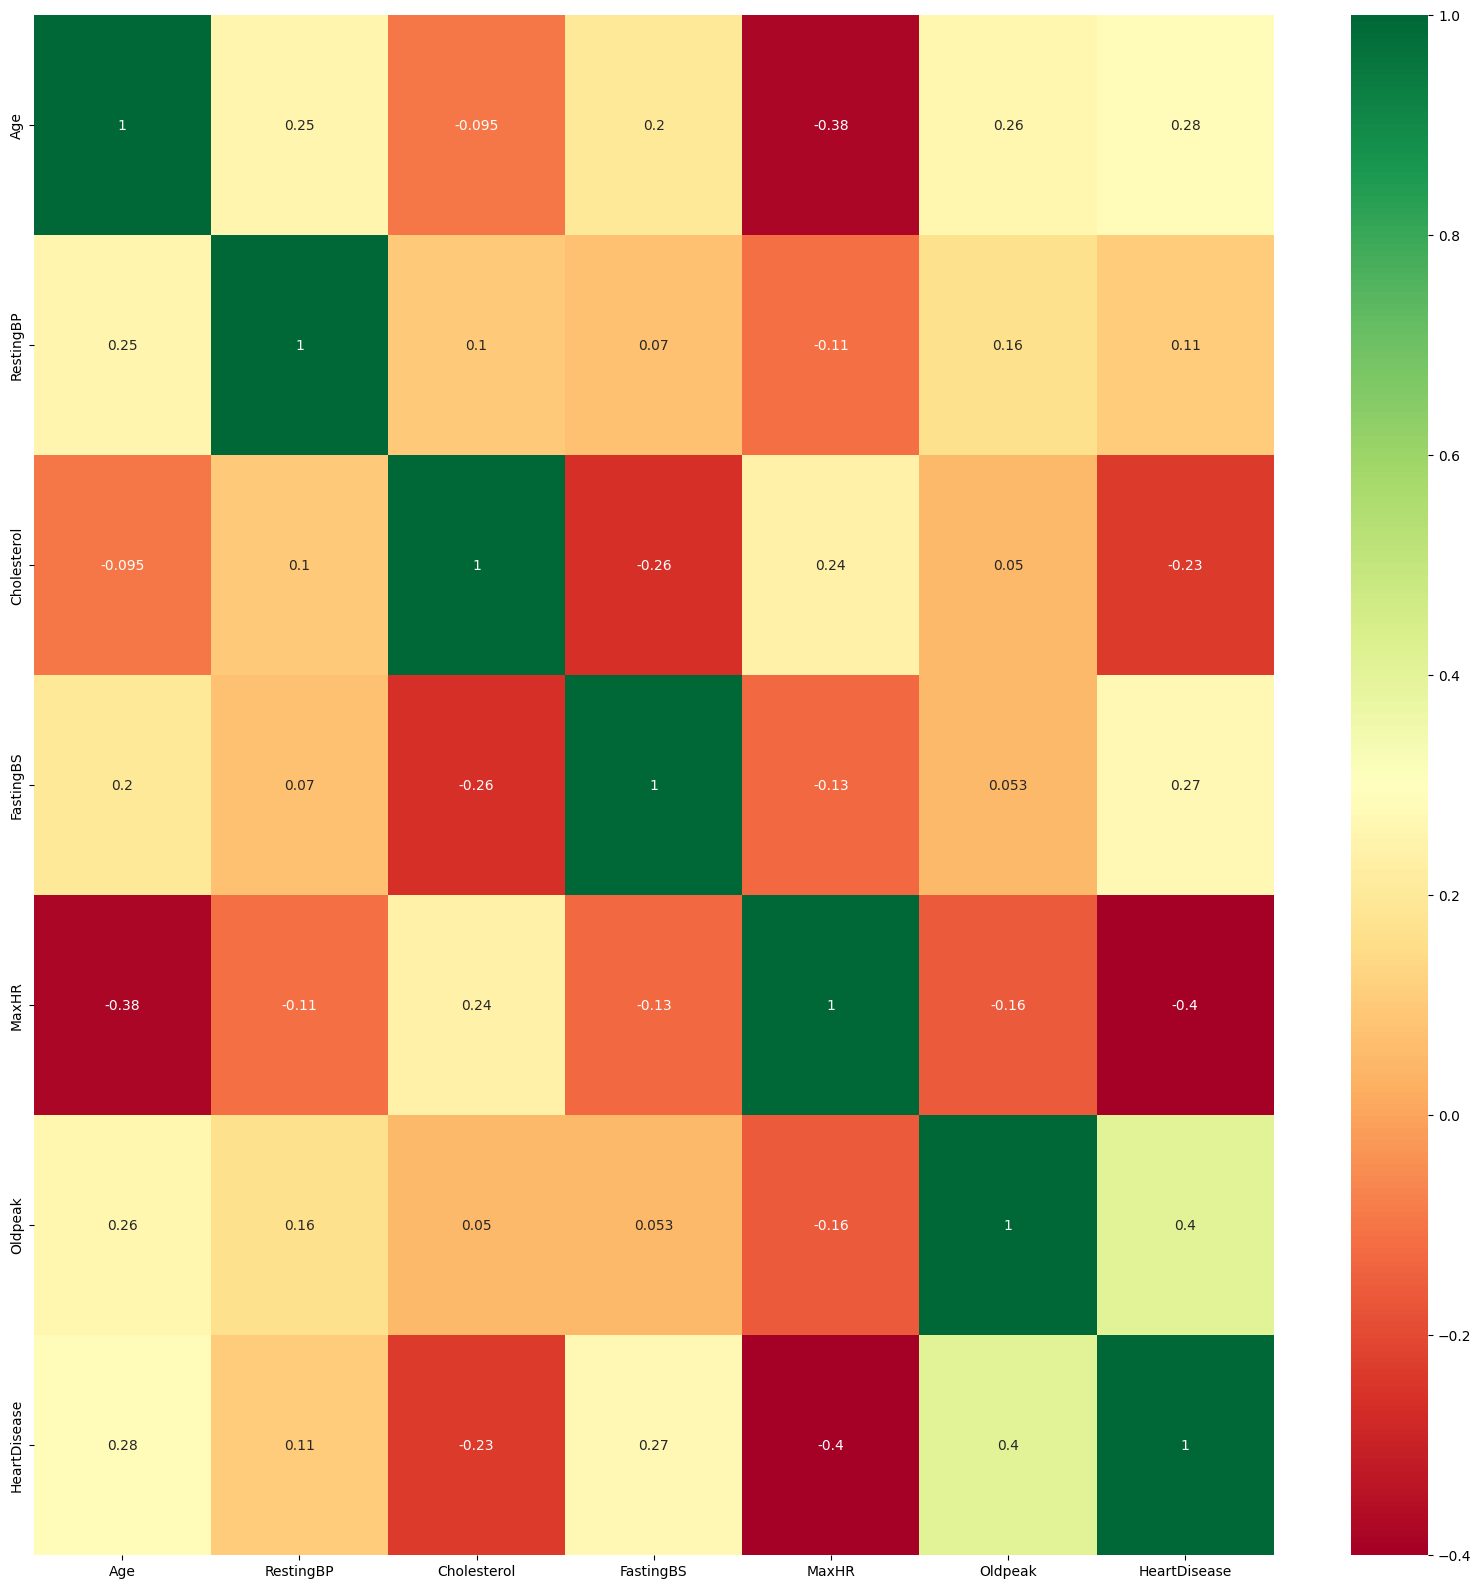

In [8]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
# Assuming 'df' is your DataFrame
# Select only numerical columns before calculating correlations
numerical_df = df.select_dtypes(include=['number'])  # Select columns with numerical data types

#get correlations of each features in dataset
corrmat = numerical_df.corr()  # Calculate correlations on the numerical subset
top_corr_features = corrmat.index
plt.figure(figsize=(20, 20))
#plot heat map
g = sns.heatmap(df[top_corr_features].corr(), annot=True, cmap='RdYlGn')
plt.show()

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RestingBP'}>,
        <Axes: title={'center': 'Cholesterol'}>],
       [<Axes: title={'center': 'FastingBS'}>,
        <Axes: title={'center': 'MaxHR'}>,
        <Axes: title={'center': 'Oldpeak'}>],
       [<Axes: title={'center': 'HeartDisease'}>, <Axes: >, <Axes: >]],
      dtype=object)

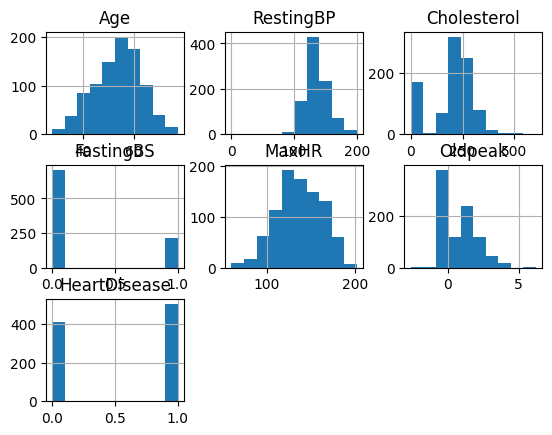

In [9]:
df.hist()

<Axes: xlabel='HeartDisease', ylabel='count'>

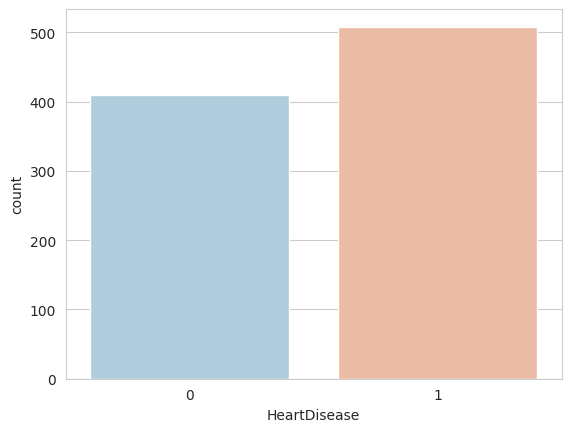

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='HeartDisease',data=df,palette='RdBu_r')

Data Processing

In [11]:
heart = pd.get_dummies(df, columns = ['Sex','ChestPainType','FastingBS','RestingECG','ExerciseAngina','ST_Slope'])


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
standardScaler = StandardScaler()

columns_to_scale = ['Age', 'Cholesterol', 'Oldpeak']

# Apply standardization to selected columns
heart[columns_to_scale] = standardScaler.fit_transform(heart[columns_to_scale])

In [13]:
heart.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,FastingBS_0,FastingBS_1,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,140,0.825070,172,-0.832432,0,False,True,False,True,...,True,False,False,True,False,True,False,False,False,True
1,-0.478484,160,-0.171961,156,0.105664,1,True,False,False,False,...,True,False,False,True,False,True,False,False,True,False
2,-1.751359,130,0.770188,98,-0.832432,0,False,True,False,True,...,True,False,False,False,True,True,False,False,False,True
3,-0.584556,138,0.139040,108,0.574711,1,True,False,True,False,...,True,False,False,True,False,False,True,False,True,False
4,0.051881,150,-0.034755,122,-0.832432,0,False,True,False,False,...,True,False,False,True,False,True,False,False,False,True


In [15]:
y=heart['HeartDisease']
X=heart.drop(['HeartDisease'],axis=1)

In [16]:
from sklearn.model_selection import cross_val_score
knn_scores=[]
for k in range (1,18):
  knn_classifier =KNeighborsClassifier(n_neighbors=k)
  score=cross_val_score(knn_classifier,X,y,cv=10)
  knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

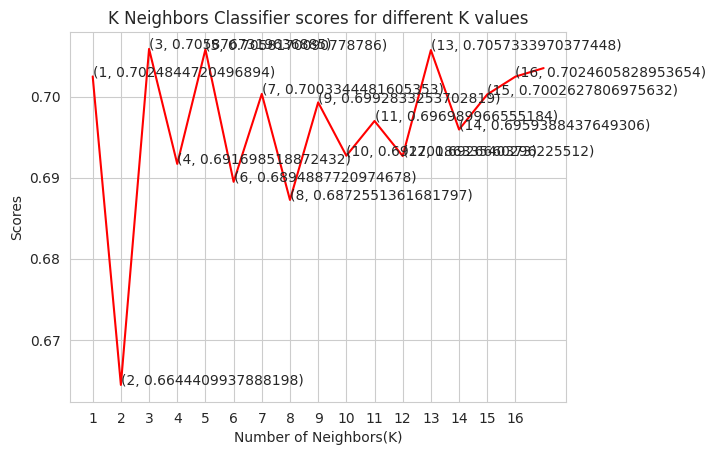

In [17]:
plt.plot([k for k in range(1,18)],knn_scores,color='red')
for i in range (1,17):
  plt.text(i,knn_scores[i-1],(i,knn_scores[i-1]))
plt.xticks([i for i in range (1,17)])
plt.xlabel('Number of Neighbors(K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [18]:
knn_classifier=KNeighborsClassifier(n_neighbors=12)
score=cross_val_score(knn_classifier,X,y,cv=10)
knn_scores.append(score.mean())

In [19]:
knn_scores

[0.7024844720496894,
 0.6644409937888198,
 0.7058767319636885,
 0.691698518872432,
 0.7058170090778786,
 0.6894887720974678,
 0.7003344481605353,
 0.6872551361681797,
 0.6992833253702819,
 0.6927018633540373,
 0.696989966555184,
 0.6926660296225512,
 0.7057333970377448,
 0.6959388437649306,
 0.7002627806975632,
 0.7024605828953654,
 0.7035117056856187,
 0.6926660296225512]

In [20]:
score.mean()

0.6926660296225512

Random  Forest Classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
randomforest_classifier=RandomForestClassifier(n_estimators=10)
score=cross_val_score(randomforest_classifier,X,y,cv=10)

In [23]:
score.mean()

0.8387004300047778